# EC2 - fluência

In [22]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from ipywidgets import interact
fcm = 28
rh = 50
h0 = 100
t0 = 5
a3 = max(1.0, math.sqrt(35.0/fcm))

a3

1.118033988749895

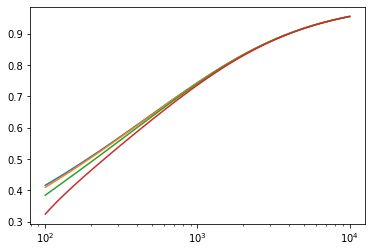

In [23]:
t = np.logspace(2, 4, 100)
def beta_cc(tt, bh, to):
    a = math.pow((tt-to)/(bh+tt-to), 0.3)
    return a

betah = max(1500*a3, 1.5*(1.0+math.pow(0.012*rh,18))*h0+250*a3)
betacc = np.vectorize(beta_cc)
for tt0 in [5, 10, 28, 60]:
    bcc = betacc(t, betah, tt0)
    #fig, ax = plt.subplots(1, 1, figsize=(16, 6))
    plt.xscale('log')
    plt.plot(t, bcc)


In [28]:
h0 = widgets.FloatSlider(value=0.3,min=0.15,max=0.6,step=0.025,description='h0 (m):',readout_format='.3f')
d = widgets.FloatLogSlider(value=28,min=0,max=5,step=0.025,description='t (d):',readout_format='.0f')
rh = widgets.FloatSlider(value=80,min=0,max=100,step=1,description='RH (%):',readout_format='.0f')
fck = widgets.FloatSlider(value=20,min=20,max=50,step=5,description='fck (MPa):',readout_format='.0f')
fck2 = widgets.Dropdown(
    options=[('C20/25', 20.0), ('C25/30', 25.0), ('C30/37', 30.0), ('C35/45', 35.0), ('C40/50', 40.0), ('C45/55', 45.0), ('C50/60', 50.0)],
    value=20,
    description='Concrete:',
)
fyk2 = widgets.Dropdown(
    options=[('A400', 400.0), ('A500', 500.0)],
    value=400,
    description='Steel:',
)
cem = widgets.Dropdown(
    options=[('Type R', 0.2), ('Type N', 0.25), ('Type S', 0.38)],
    value=0.2,
    description='Cement:'
)
med = widgets.FloatSlider(value=100,min=1,max=1000,step=1,description='Med (kNm):',readout_format='.0f')
tab1 = VBox(children=[h0,d,rh,med,fck,cem])

In [29]:
@interact(b=h0, d=d, rh=rh, med=med, fck=fck, cem=cem)
def plot(b=0.3, d=0.5, rh=65, med=100.0, fck=20.0, cem=0.2):
    fcd = fck/1.5
    fyd = 400.0/1.15
    mmed = med
    bb = b
    dd = d
    miu = mmed/bb/d**2/fcd/1000.0
    try:
        omega = 1.0-math.sqrt(1-2*miu)
    except:
        omega = math.nan
    alpha = 1.25*omega
    ast = omega*b*d*fcd/fyd * 10000.0
    epss = (1.0-alpha)*3.5/alpha
    rho = omega*fcd/fyd*100.0
    print("miu={:.3f} omega={:.3f} x/d={:.3f} eps-s={:.3f} As={:.2f} cm2 rho(%)={:.2f}".format(miu, round(omega,3), alpha, epss, ast, rho))

interactive(children=(FloatSlider(value=0.3, description='h0 (m):', max=0.6, min=0.15, readout_format='.3f', s…